In [291]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import seaborn as sns 

# **Wine Rebiews**
----

### 对数据进行大致浏览，观看前5行数据

In [292]:
WR1 = pd.read_csv('Wine Reviews/winemag-data-130k-v2.csv')
WR2 = pd.read_csv('Wine Reviews/winemag-data-130k-v2.csv')
WR=pd.concat([WR1,WR2],ignore_index=True,sort=False)
WR=WR.drop(labels='Unnamed: 0',axis=1)
WR.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### 数据去重复

In [293]:
WR.duplicated().value_counts()

True     139954
False    119988
dtype: int64

In [294]:
wine=WR.drop_duplicates()
#进一步检查，发现存在很多字段都重复的数据，认为是重复数据并将其清除
dupilicated_index=list(wine[wine[['country','description','designation','province','points','price']].duplicated()].index)
wine=wine.drop(labels=dupilicated_index,axis=0)
wine.reset_index(drop=True)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119978,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
119979,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
119980,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
119981,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


### 查看哪些属性存在缺失值

In [295]:
wine.isnull().sum()

country                     59
description                  0
designation              34544
points                       0
price                     8393
province                    59
region_1                 19560
region_2                 73215
taster_name              24916
taster_twitter_handle    29445
title                        0
variety                      1
winery                       0
dtype: int64

## 一、数据可视化和摘要
### 1.1 数据摘要
#### 1.1.1 数值数据统计描述：5数概括 主要包括均值，标准差，最小数，四分位数，最大值 和缺失值个数
##### 5值概括

In [296]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
points,119983.0,88.442213,3.092916,80.0,86.0,88.0,91.0,100.0
price,111590.0,35.621086,42.104210,4.0,17.0,25.0,42.0,3300.0


##### 缺失值个数

In [297]:
wine[['points','price']].isnull().sum()

points       0
price     8393
dtype: int64

### 1.1.2 标称属性统计描述：取值频数，缺失值

In [298]:
for i in WR.columns:
    if i not in ['points','price','description','title']:
        print('属性: {} 的频数'.format(i))
        print(WR[i].value_counts().head())
        


属性: country 的频数
US          109008
France       44186
Italy        39080
Spain        13290
Portugal     11382
Name: country, dtype: int64
属性: designation 的频数
Reserve         4018
Estate          2644
Reserva         2518
Riserva         1396
Estate Grown    1242
Name: designation, dtype: int64
属性: province 的频数
California    72494
Washington    17278
Bordeaux      11882
Tuscany       11794
Oregon        10746
Name: province, dtype: int64
属性: region_1 的频数
Napa Valley             8960
Columbia Valley (WA)    8248
Russian River Valley    6182
California              5258
Paso Robles             4700
Name: region_1, dtype: int64
属性: region_2 的频数
Central Coast        22130
Sonoma               18056
Columbia Valley      16206
Napa                 13628
Willamette Valley     6846
Name: region_2, dtype: int64
属性: taster_name 的频数
Roger Voss           51028
Michael Schachner    30268
Kerin O’Keefe        21552
Virginie Boone       19074
Paul Gregutt         19064
Name: taster_name, dtype: int64

### 1.2 数据可视化
1. 绘制价格度数之间的散点图，根据散点图的分布，可以明显看出文件明显存在离群点，将price >= 1400 的数据剔除

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'price-points scatter')

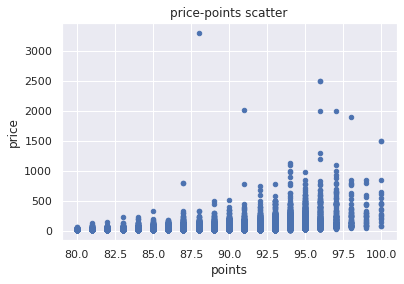

In [299]:
wine.plot.scatter(x='points',y='price')
plt.title('price-points scatter')

2. 绘制价格和度数的盒图，通过盒图可以判断出超过分位数的点，从而认为是离群点

count    119983.000000
mean         88.442213
std           3.092916
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

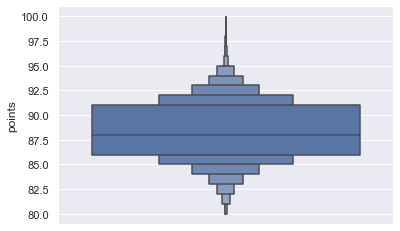

In [300]:
sns.set()
sns.boxenplot(y='points',data=wine)
wine['points'].describe()

count    111590.000000
mean         35.621086
std          42.104210
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

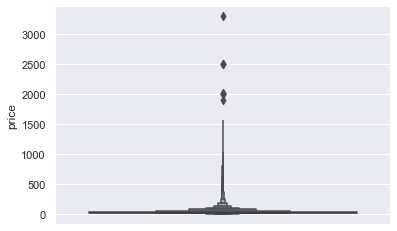

In [301]:
sns.set()
sns.boxenplot(y='price',data=wine)
wine['price'].describe()

3. 绘制标称属性的统计柱状图 通过柱状图看可以看到整体数据分布情况

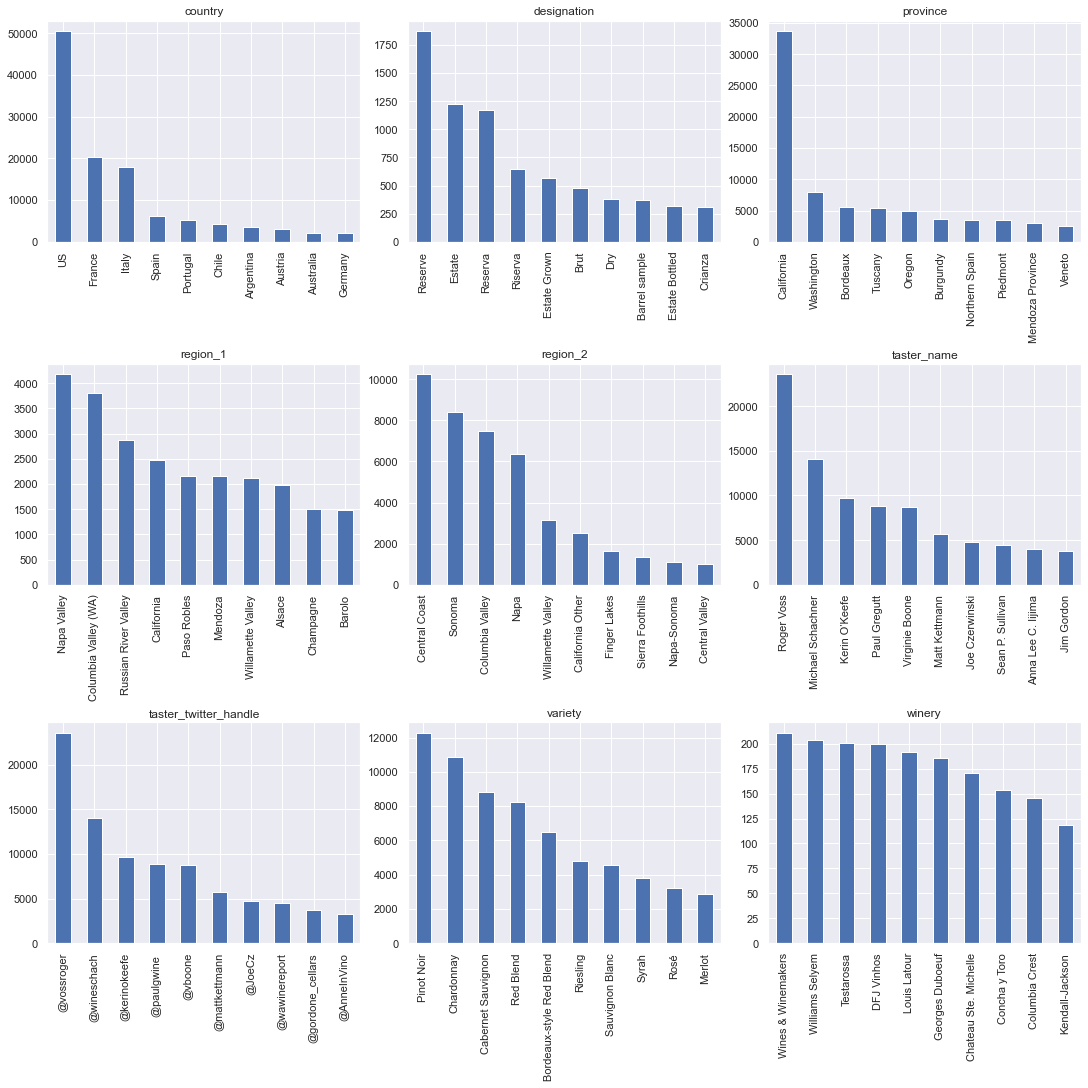

In [302]:
f,ax = plt.subplots(nrows=3,ncols=3,figsize=(15,15),constrained_layout=True)

name = ['country', 'designation', 'province', 
        'region_1', 'region_2', 'taster_name',
        'taster_twitter_handle', 'variety', 'winery']
name_idx = 0
for i in range(3):
    for j in range(3):
        tmp = wine[name[name_idx]].value_counts()[:10]
        tmp.plot(kind='bar',title=name[name_idx],ax = ax[i][j])
        name_idx += 1  


# 2、数据缺失值补充
## 2.1 缺失值剔除
(1) 直接删除所有存在的缺失值

In [303]:
wine_ = wine.dropna()


(2) 对比剔除缺失值前后数据 先打印剔除缺失值前后的五值分析


In [304]:
print('剔除缺失值前的数据五值分布：\n',wine.describe().T,'\n剔除缺失值后的五值分析分布:\n',wine_.describe().T)

剔除缺失值前的数据五值分布：
            count       mean        std   min   25%   50%   75%     max
points  119983.0  88.442213   3.092916  80.0  86.0  88.0  91.0   100.0
price   111590.0  35.621086  42.104210   4.0  17.0  25.0  42.0  3300.0 
剔除缺失值后的五值分析分布:
           count       mean        std   min   25%   50%   75%     max
points  20493.0  89.558825   2.855594  80.0  88.0  90.0  92.0   100.0
price   20493.0  41.651003  30.008309   4.0  25.0  36.0  50.0  2013.0


(3)进行剔除缺失值可视化

In [305]:
tmp_df = pd.DataFrame()
tmp_df['distribe'] = list(wine.describe().index.to_numpy()) + list(wine_.describe().index.to_numpy())
tmp_df['points'] = list(wine.describe()['points']) + list(wine_.describe()['points'])
tmp_df['price'] = list(wine.describe()['price']) + list(wine_.describe()['price'])
tmp_df['isNan'] = [ True for i in range(8)] + [ False for i in range(8)]

tmp_df

,distribe,points,price,isNan
0,count,119983.000000,111590.000000,True
1,mean,88.442213,35.621086,True
2,std,3.092916,42.104210,True
3,min,80.000000,4.000000,True
4,25%,86.000000,17.000000,True
5,50%,88.000000,25.000000,True
6,75%,91.000000,42.000000,True
7,max,100.000000,3300.000000,True
8,count,20493.000000,20493.000000,False
9,mean,89.558825,41.651003,False


（3）- 1 绘制数量统计图  
左边：points的数据统计，右边：price的数据统计，可以看出来数据中存在着大量的缺失值

<AxesSubplot:xlabel='distribe', ylabel='price'>

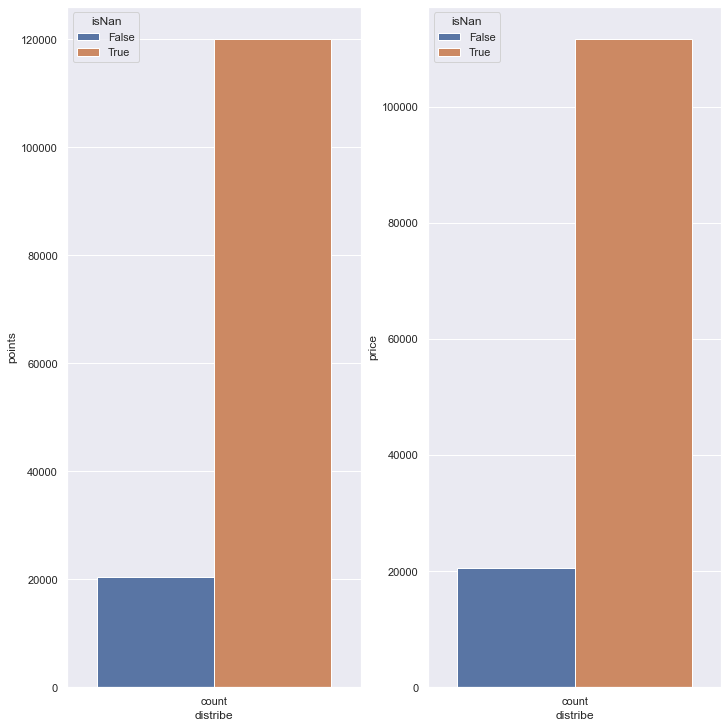

In [306]:
fig,axes=plt.subplots(1,2,constrained_layout=True,figsize=(10, 10))
sns.barplot(x="distribe", y="points", hue="isNan", data=tmp_df[tmp_df['distribe']=='count'],ax=axes[0])
sns.barplot(x="distribe", y="price", hue="isNan", data=tmp_df[tmp_df['distribe']=='count'],ax=axes[1])

（3）- 2 绘制五值分析统计图  
  可以看到prince中的最大值过大，可以认为这个是个异常值，在处理时候进行剔除


<AxesSubplot:xlabel='distribe', ylabel='price'>

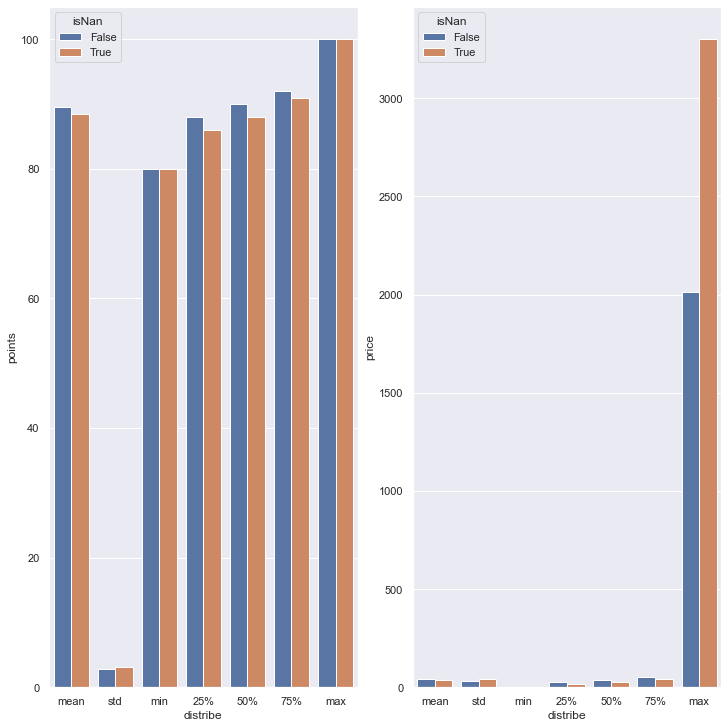

In [307]:
fig,axes=plt.subplots(1,2,constrained_layout=True,figsize=(10, 10))
sns.barplot(x="distribe", y="points", hue="isNan", data=tmp_df[tmp_df['distribe']!='count'],ax=axes[0])
sns.barplot(x="distribe", y="price", hue="isNan", data=tmp_df[tmp_df['distribe']!='count'],ax=axes[1])

剔除后结果,剔除异常值后结果对比可以看到较好，能够看见其他的五值分布情况了

<AxesSubplot:xlabel='distribe', ylabel='price'>

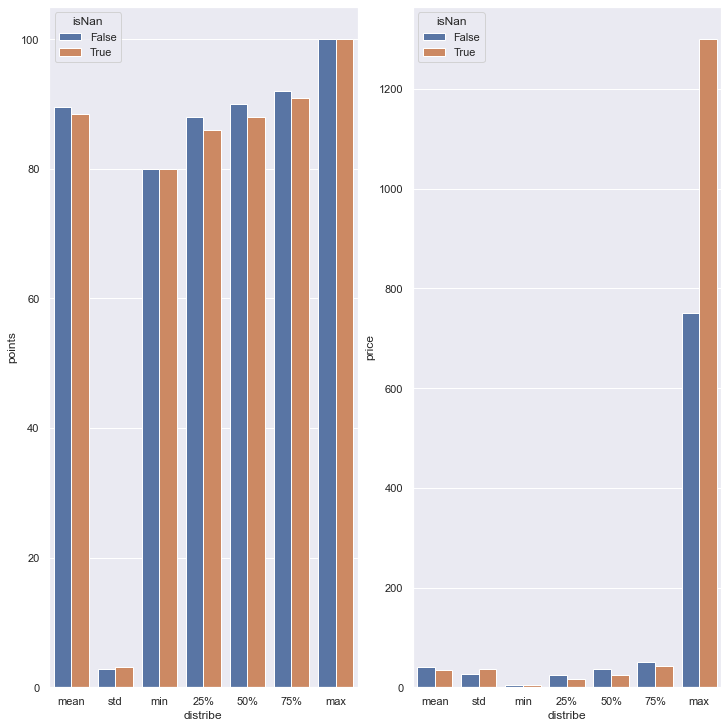

In [308]:
wine_ = wine_[wine_['price']<=1400]
wine_1400 = wine[wine['price']<=1400]
tmp_df = pd.DataFrame()
tmp_df['distribe'] = list(wine_1400.describe().index.to_numpy()) + list(wine_.describe().index.to_numpy())
tmp_df['points'] = list(wine_1400.describe()['points']) + list(wine_.describe()['points'])
tmp_df['price'] = list(wine_1400.describe()['price']) + list(wine_.describe()['price'])
tmp_df['isNan'] = [ True for i in range(8)] + [ False for i in range(8)]
fig,axes=plt.subplots(1,2,constrained_layout=True,figsize=(10, 10))
sns.barplot(x="distribe", y="points", hue="isNan", data=tmp_df[tmp_df['distribe']!='count'],ax=axes[0])
sns.barplot(x="distribe", y="price", hue="isNan", data=tmp_df[tmp_df['distribe']!='count'],ax=axes[1])

（3）- 3 绘制盒图，查看分布

<AxesSubplot:xlabel='carg', ylabel='data'>

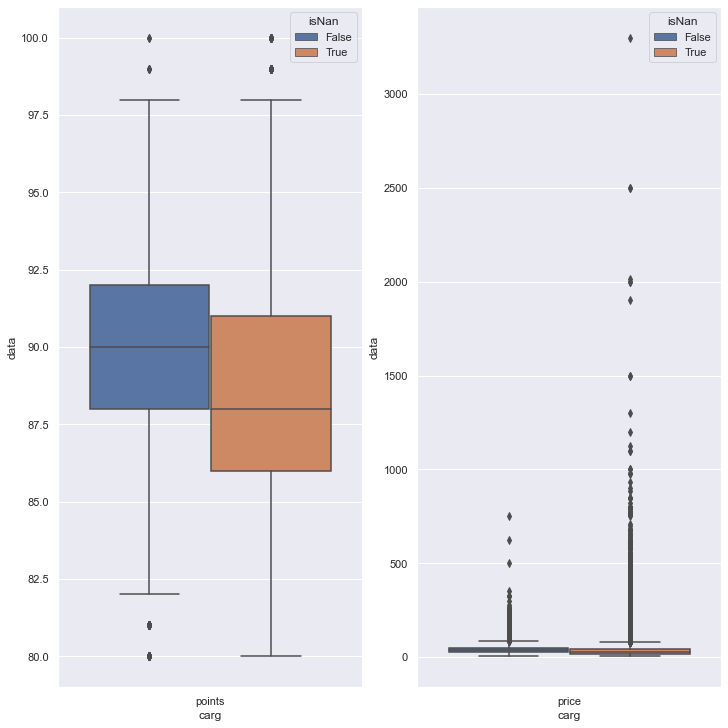

In [309]:
tmp_df = pd.DataFrame()
tmp_df['data'] = wine['points'].to_list() + wine_['points'].to_list() + wine['price'].to_list() + wine_['price'].to_list()
tmp_df['carg'] = ['points' for i in range(len(wine['points'].to_list() + wine_['points'].to_list()))] + ['price' for i in range(len(wine['price'].to_list() + wine_['price'].to_list()))]
tmp_df['isNan'] = [True for i in range(len(wine['points']))] + [False for i in range(len(wine_['points']))] + [True for i in range(len(wine['points']))] + [False for i in range(len(wine_['points']))]

fig,axes=plt.subplots(1,2,constrained_layout=True,figsize=(10, 10))
sns.boxplot(x='carg',y='data',data=tmp_df[tmp_df['carg']=='points'],hue='isNan',ax=axes[0])
sns.boxplot(x='carg',y='data',data=tmp_df[tmp_df['carg']=='price'],hue='isNan',ax=axes[1])

## 3.2 最高频率填补 - 标称属性很难填补，因此这里只对数值数属性进行填补
(1) 使用众数填补缺失值

In [310]:
price_mode = wine['price'].value_counts().index.to_list()[0]
points_mode = wine['points'].value_counts().index.to_list()[0]
wine_1 = pd.DataFrame()
price=[]
points=[]

price_list = wine['price'].fillna(value=price_mode)
points_list = wine['points'].fillna(value=points_mode)

# for i,j in zip(price_list,points_list):
#     if i == 'NaN' :
#         print(11)
#         price.append(price_mode)
#     else:
#         price.append(i)
    
#     if j == None :
#         points.append(points_mode)
#     else:
#         points.append(j)

# print(len(price),len(points))

wine_1['price'] = price_list
wine_1['points'] = points_list

In [311]:
print(wine_1['price'])

0         20.0
1         15.0
2         14.0
3         13.0
4         65.0
          ... 
129966    28.0
129967    75.0
129968    30.0
129969    32.0
129970    21.0
Name: price, Length: 119983, dtype: float64


（2）查看两者五值描述对比

In [312]:
print('剔除缺失值前的数据五值分布：\n',wine.describe().T,'\n修改缺失值后的五值分析分布:\n',wine_1.describe().T)

剔除缺失值前的数据五值分布：
            count       mean        std   min   25%   50%   75%     max
points  119983.0  88.442213   3.092916  80.0  86.0  88.0  91.0   100.0
price   111590.0  35.621086  42.104210   4.0  17.0  25.0  42.0  3300.0 
修改缺失值后的五值分析分布:
            count       mean        std   min   25%   50%   75%     max
price   119983.0  34.528367  40.799894   4.0  18.0  25.0  40.0  3300.0
points  119983.0  88.442213   3.092916  80.0  86.0  88.0  91.0   100.0


（3）进行可视化

<AxesSubplot:xlabel='carg', ylabel='data'>

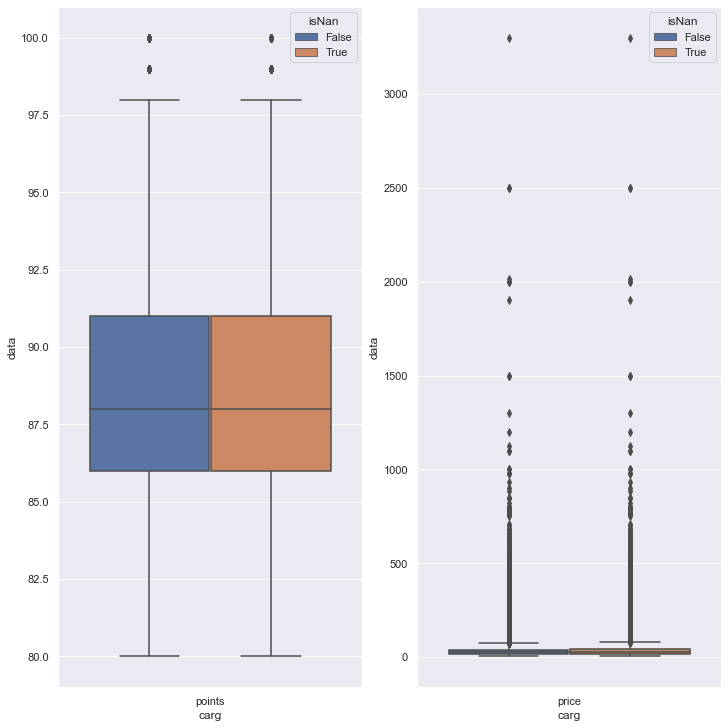

In [313]:
tmp_df = pd.DataFrame()
tmp_df['data'] = wine['points'].to_list() + wine_1['points'].to_list() + wine['price'].to_list() + wine_1['price'].to_list()
tmp_df['carg'] = ['points' for i in range(len(wine['points'].to_list() + wine_1['points'].to_list()))] + ['price' for i in range(len(wine['price'].to_list() + wine_1['price'].to_list()))]
tmp_df['isNan'] = [True for i in range(len(wine['points']))] + [False for i in range(len(wine_1['points']))] + [True for i in range(len(wine['points']))] + [False for i in range(len(wine_1['points']))]

fig,axes=plt.subplots(1,2,constrained_layout=True,figsize=(10, 10))
sns.boxplot(x='carg',y='data',data=tmp_df[tmp_df['carg']=='points'],hue='isNan',ax=axes[0])
sns.boxplot(x='carg',y='data',data=tmp_df[tmp_df['carg']=='price'],hue='isNan',ax=axes[1])

（3）发现其实进行众数填补后前后结果相差不大

<AxesSubplot:xlabel='distribe', ylabel='price'>

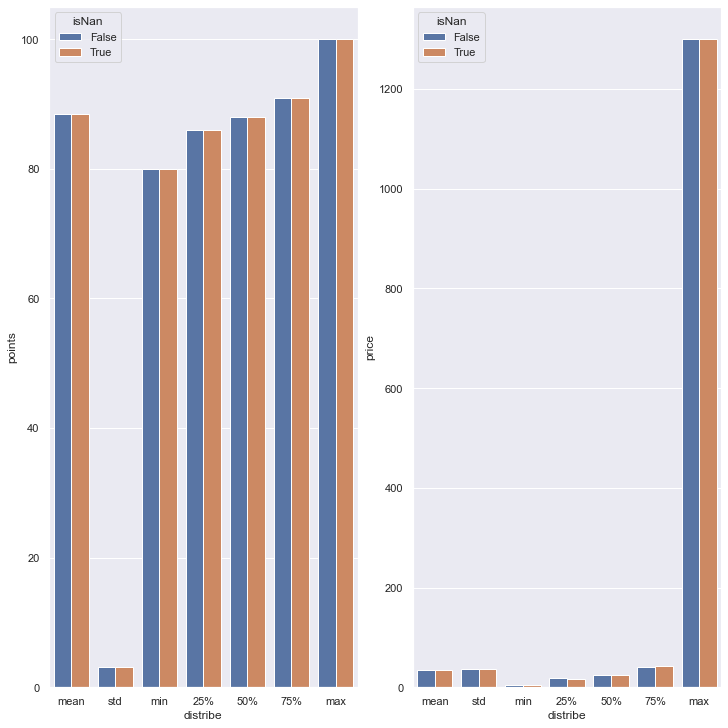

In [314]:
wine_1 = wine_1[wine_1['price']<=1400]
wine_1400 = wine[wine['price']<=1400]
tmp_df = pd.DataFrame()
tmp_df['distribe'] = list(wine_1400.describe().index.to_numpy()) + list(wine_1.describe().index.to_numpy())
tmp_df['points'] = list(wine_1400.describe()['points']) + list(wine_1.describe()['points'])
tmp_df['price'] = list(wine_1400.describe()['price']) + list(wine_1.describe()['price'])
tmp_df['isNan'] = [ True for i in range(8)] + [ False for i in range(8)]
fig,axes=plt.subplots(1,2,constrained_layout=True,figsize=(10, 10))
sns.barplot(x="distribe", y="points", hue="isNan", data=tmp_df[tmp_df['distribe']!='count'],ax=axes[0])
sns.barplot(x="distribe", y="price", hue="isNan", data=tmp_df[tmp_df['distribe']!='count'],ax=axes[1])

## 3.3 使用相关性分析填补空缺值
通过分析1.2中散点图可以认为points和价格存在相关关系，因此对这两个属性构建回归方程，进行填补空缺值

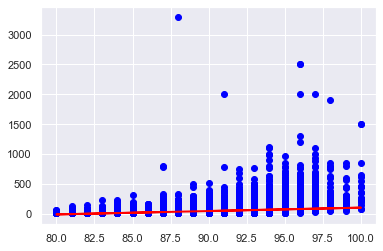

In [315]:
from sklearn.linear_model import LinearRegression,LogisticRegression

wine_2 = wine.dropna(subset=['price'])
X = wine_2['points'].tolist()
Y = wine_2['price'].tolist()
p = np.polyfit(X,Y,1)
X,Y = np.asarray(X).reshape(len(X),1),np.asarray(Y).reshape(len(Y),1)
regr = LinearRegression()
regr.fit(X,Y)

plt.scatter(X,Y,color='blue')
# plt.xlim((20, 80))
# plt.ylim((0, 50))
plt.plot(X,regr.predict(X), color='red', linewidth=2)
# # plt.plot([20, 80], [0, 50], linewidth=2)
# plt.xlabel('points quantiles')
# plt.ylabel('price quantiles')
# plt.title('Q-Q plot')

使用回归方程进行缺失值填补

In [316]:
wine_21 = pd.DataFrame()
wine_21['old_price'] = wine['price']
points_emp = wine[~wine['price'].isna()]['points']
pre_price = regr.predict(points_emp.to_numpy().reshape(-1,1))
new_price = []
for i,j in zip(wine['price'],wine['points']):

    if str(i) == 'nan':
        j = [[j]]
        tmp = regr.predict(j)[0][0]
        new_price.append(tmp)
    else:
        new_price.append(i)
wine_21['new_price'] = new_price
        

进行描述性展示

In [317]:
print('修改缺失值前后的五值分析分布:\n',wine_21.describe())

修改缺失值前后的五值分析分布:
            old_price      new_price
count  111590.000000  119983.000000
mean       35.621086      35.780720
std        42.104210      40.854719
min         4.000000     -11.998474
25%        17.000000      17.000000
50%        25.000000      27.000000
75%        42.000000      44.597108
max      3300.000000    3300.000000


进行可视化展示

<AxesSubplot:>

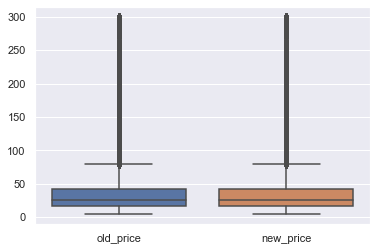

In [318]:
tmp_df = wine_21
sns.boxplot(data=tmp_df[tmp_df['old_price']<=300])


# Melbourne Airbnb Open Data
---
#### 上一个数据集已经对缺失值等方法进行了展示，因此这个数据集更重在对数据的详细分析，对缺失值处理方式较少，但会对其进行详细的分析

### 1 打开数据进行整体概览

In [319]:
listings = pd.read_csv('./archive/listings_summary_dec18.csv')
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9835,Beautiful Room & House,33057,Manju,NaN,Manningham,-37.772684,145.092133,Private room,60,1,4,2015-09-12,0.04,1,365
1,10803,Room in Cool Deco Apartment in Brunswick,38901,Lindsay,NaN,Moreland,-37.766505,144.980736,Private room,35,3,108,2018-11-26,1.50,1,213
2,12936,St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC,50121,Frank & Vince,NaN,Port Phillip,-37.859755,144.977369,Entire home/apt,159,3,15,2018-11-07,0.15,17,326
3,15246,Large private room-close to city,59786,Eleni,NaN,Darebin,-37.758971,144.989228,Private room,50,2,29,2017-05-15,0.30,3,0
4,16760,Melbourne BnB near City & Sports,65090,Colin,NaN,Port Phillip,-37.864530,144.992238,Private room,69,1,63,2018-11-22,0.74,1,328


In [320]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22895 entries, 0 to 22894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22895 non-null  int64  
 1   name                            22892 non-null  object 
 2   host_id                         22895 non-null  int64  
 3   host_name                       22892 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   22895 non-null  object 
 6   latitude                        22895 non-null  float64
 7   longitude                       22895 non-null  float64
 8   room_type                       22895 non-null  object 
 9   price                           22895 non-null  int64  
 10  minimum_nights                  22895 non-null  int64  
 11  number_of_reviews               22895 non-null  int64  
 12  last_review                     

### 2 数据预处理
主要处理：
   1. 删除类似ID的列
   2. 处理常量特征、
   3. 重复观察
   4. 去除实验不相关的其他不相关的特征
   5. 去除重复特征
   6. 修改日期和时间特征  

首先检查具有唯一值的列，可以用作我们分析的索引。ID列似乎具有每个观察的唯一值。在此之前去除重复的ID


In [321]:
for col in listings.columns:
    print('Unique values in {} is {}'.format(col,len(listings[col].unique())))

Unique values in id is 22895
Unique values in name is 22450
Unique values in host_id is 14988
Unique values in host_name is 5818
Unique values in neighbourhood_group is 1
Unique values in neighbourhood is 30
Unique values in latitude is 22895
Unique values in longitude is 22895
Unique values in room_type is 3
Unique values in price is 458
Unique values in minimum_nights is 70
Unique values in number_of_reviews is 298
Unique values in last_review is 1190
Unique values in reviews_per_month is 852
Unique values in calculated_host_listings_count is 51
Unique values in availability_365 is 366


每个列表的ID都是唯一的，因此将其设置为索引

In [322]:
listings.set_index('id',inplace=True)
listings.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
9835,Beautiful Room & House,33057,Manju,NaN,Manningham,-37.772684,145.092133,Private room,60,1,4,2015-09-12,0.04,1,365
10803,Room in Cool Deco Apartment in Brunswick,38901,Lindsay,NaN,Moreland,-37.766505,144.980736,Private room,35,3,108,2018-11-26,1.50,1,213
12936,St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC,50121,Frank & Vince,NaN,Port Phillip,-37.859755,144.977369,Entire home/apt,159,3,15,2018-11-07,0.15,17,326
15246,Large private room-close to city,59786,Eleni,NaN,Darebin,-37.758971,144.989228,Private room,50,2,29,2017-05-15,0.30,3,0
16760,Melbourne BnB near City & Sports,65090,Colin,NaN,Port Phillip,-37.864530,144.992238,Private room,69,1,63,2018-11-22,0.74,1,328


检查恒相同特征并删除它们

In [323]:
print("Number of observations before"+ ": " +  str(len(listings)))
listings.drop_duplicates(inplace=True)
print("Number of observations after" + ": " + str(len(listings)))

Number of observations before: 22895
Number of observations after: 22895


删除不相关的特征

In [324]:
listings.drop(['name','host_name'],axis=1,inplace=True)
listings.shape

(22895, 13)

### 2、缺失值处理
特征查看缺失值比例

In [325]:
listings.isnull().sum()/len(listings)

host_id                           0.000000
neighbourhood_group               1.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.228958
reviews_per_month                 0.228958
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

##### 缺失值处理
- 列邻居有所有缺失的值-此列不提供任何信息，因此剔除因此最好放下这列。
- 列last_review和reviews_per_month缺少值，这可能是由于列表是新的，并且尚未发布列表id的评论。最好将该列的reviews_per_month中的NAN替换为0，而last_review没有意义，因此删除该列

In [326]:
listings.drop(['neighbourhood_group','last_review'],axis=1,inplace=True)
listings.head()

,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,
9835,33057,Manningham,-37.772684,145.092133,Private room,60,1,4,0.04,1,365
10803,38901,Moreland,-37.766505,144.980736,Private room,35,3,108,1.50,1,213
12936,50121,Port Phillip,-37.859755,144.977369,Entire home/apt,159,3,15,0.15,17,326
15246,59786,Darebin,-37.758971,144.989228,Private room,50,2,29,0.30,3,0
16760,65090,Port Phillip,-37.864530,144.992238,Private room,69,1,63,0.74,1,328


缺失值替换为0

In [327]:
listings['reviews_per_month'].replace(np.NaN,0,inplace=True)
listings.isnull().any()

host_id                           False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

### 3、离群点检测

In [328]:
listings.columns[listings.dtypes != 'O']

Index(['host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [329]:
listings['price'].describe()

count    22895.000000
mean       148.004368
std        210.883253
min          0.000000
25%         71.000000
50%        111.000000
75%        165.000000
max      12624.000000
Name: price, dtype: float64

/Users/yuan/App/conda/anaconda3/envs/Pytorch/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='price'>

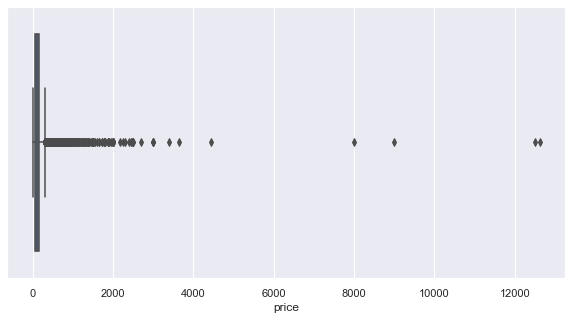

In [330]:
plt.figure(figsize=(10,5))
sns.boxplot(listings['price'])

从上面可以看出：
1. 最低价格0是不真实的。这是在输入价格时出现人为错误的情况 (最好的方法来排除这些列表或用每个社区的中位数价格值替换它们)
2. 很少有列表的价格范围12624，对这些列表进行详细分析，以检查这些列表是什么，以及在排除它们之前，在其他功能有限的情况下，出现这种峰值的原因是什么 
 
让我们检查一下每晚价格为0的房源比例。我们可以看到这些非常少，可以从我们的分析中排除。

In [331]:
len(listings[listings['price']==0])/len(listings)*100

0.09172308364271675

每种房间类型的价格分布 
观察发现： 
- 第一种跟第二种房间存在很大的离群值

/Users/yuan/App/conda/anaconda3/envs/Pytorch/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='room_type', ylabel='price'>

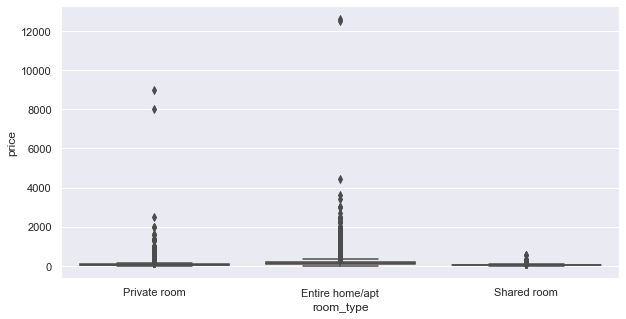

In [332]:
plt.figure(figsize=(10,5))
sns.boxplot('room_type','price',data=listings)

去除离群值

In [333]:
listings = listings[listings['price']<=6000]
listings.shape


(22891, 11)

### 4、其他分析
##### 1. 哪个邻居的列表数量最多？(AirBnb企业的热点)

In [334]:
listings.groupby(['neighbourhood'])['host_id'].count()

neighbourhood
Banyule               203
Bayside               375
Boroondara            663
Brimbank              108
Cardinia              123
Casey                 152
Darebin               697
Frankston             177
Glen Eira             631
Greater Dandenong     147
Hobsons Bay           239
Hume                  170
Kingston              309
Knox                  175
Manningham            313
Maribyrnong           436
Maroondah             115
Melbourne            7367
Melton                 95
Monash                571
Moonee Valley         344
Moreland              967
Nillumbik              88
Port Phillip         2808
Stonnington          1621
Whitehorse            614
Whittlesea            137
Wyndham               426
Yarra                2049
Yarra Ranges          771
Name: host_id, dtype: int64

/Users/yuan/App/conda/anaconda3/envs/Pytorch/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='neighbourhood'>

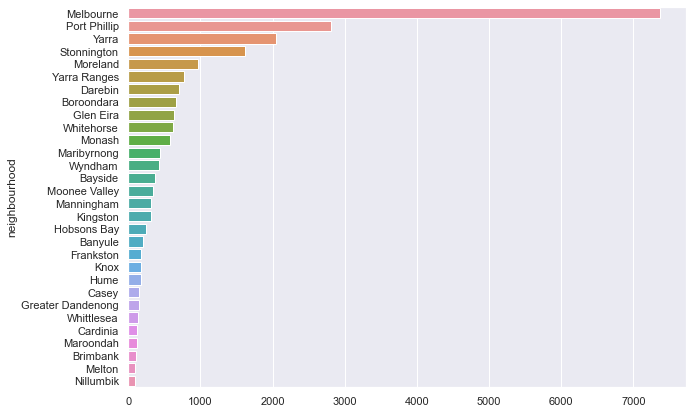

In [335]:
count_neighbours = listings.groupby(['neighbourhood'])['host_id'].count().sort_values(ascending=False)
plt.figure(figsize=(10,7))
sns.barplot(count_neighbours.values,count_neighbours.index)

很明显，大多数房源都在墨尔本，菲利普港，亚拉和斯托宁顿附近，使这些议会成为airbnb业务的热点 

从上述分析中可以提出的其他问题: 是什么使这些郊区成为AirBnB的热点-附近的地方，旅游景点，交通设施或任何其他地方。我们将在其中分析文本特征

In [336]:
import folium
from folium import plugins
from folium.plugins import HeatMap
## mappping the center of mMelbourne Region
map_heat = folium.Map(location = [-37.818792, 144.962490],
                     zoom_start=13)
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22891 entries, 9835 to 30593623
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         22891 non-null  int64  
 1   neighbourhood                   22891 non-null  object 
 2   latitude                        22891 non-null  float64
 3   longitude                       22891 non-null  float64
 4   room_type                       22891 non-null  object 
 5   price                           22891 non-null  int64  
 6   minimum_nights                  22891 non-null  int64  
 7   number_of_reviews               22891 non-null  int64  
 8   reviews_per_month               22891 non-null  float64
 9   calculated_host_listings_count  22891 non-null  int64  
 10  availability_365                22891 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 2.1+ MB


In [337]:
listing_location = listings[['latitude','longitude']]

listing_location.head()

,latitude,longitude
id,,
9835,-37.772684,145.092133
10803,-37.766505,144.980736
12936,-37.859755,144.977369
15246,-37.758971,144.989228
16760,-37.864530,144.992238


绘制热点图

In [338]:
# for index, row in listing_location.iterrows():
#     print(index,row)
heat_data = [[row['latitude'],row['longitude']] for index,row in listing_location.iterrows()]
HeatMap(heat_data).add_to(map_heat)
map_heat

##### 2.跨社区的价格变化

In [339]:
listings.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)

neighbourhood
Yarra Ranges         245.974060
Bayside              225.421333
Cardinia             167.121951
Stonnington          165.938927
Port Phillip         163.220442
Frankston            158.632768
Manningham           154.111821
Melbourne            152.933759
Nillumbik            147.500000
Boroondara           145.242836
Yarra                144.670571
Hobsons Bay          137.866109
Kingston             135.686084
Casey                135.019737
Glen Eira            118.541997
Moonee Valley        109.848837
Banyule              109.453202
Maribyrnong          108.713303
Hume                 108.552941
Darebin              108.527977
Knox                 106.502857
Wyndham              105.953052
Moreland             105.651499
Monash               105.287215
Melton               103.115789
Maroondah            101.904348
Whitehorse            99.703583
Greater Dandenong     99.680272
Whittlesea            87.708029
Brimbank              79.092593
Name: price, dtype: float6

每个郊区的价格如何变化 
下图很好的估计了每个郊区不同房间的价格变化。前三个郊区的价格差异很大

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

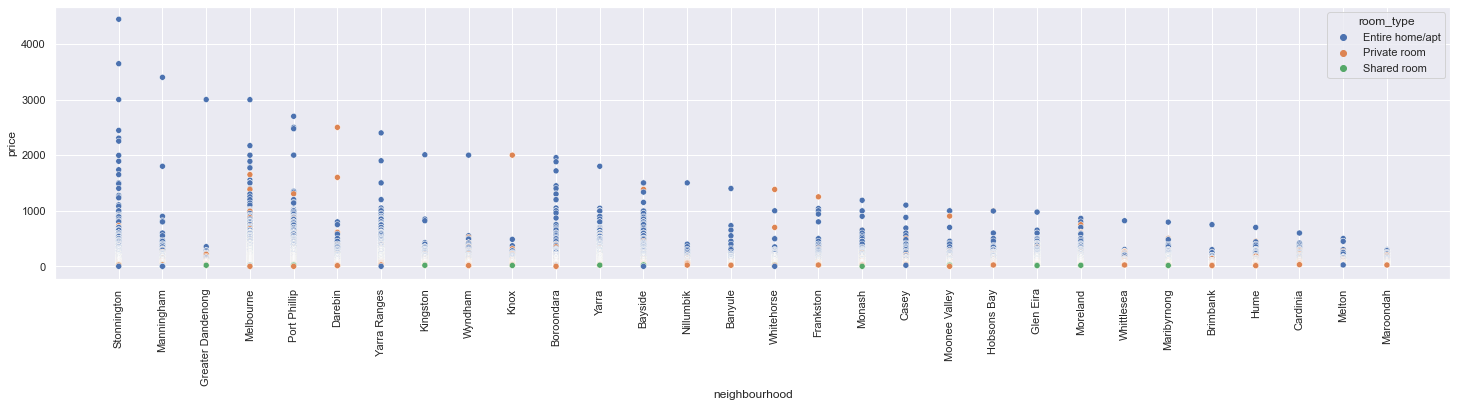

In [340]:
plt.figure(figsize=(25,5))
sns.scatterplot(x='neighbourhood',y='price',data=listings.sort_values('price',ascending=False),hue='room_type')
plt.xticks(rotation=90)

墨尔本地区不同房价的差异

/Users/yuan/App/conda/anaconda3/envs/Pytorch/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



Text(0.5, 1.0, 'Price distribution of Entire home/apt')

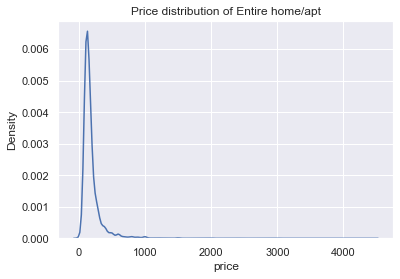

In [341]:
sns.distplot(listings[listings['room_type']=='Entire home/apt']['price'],hist=False)
plt.title('Price distribution of Entire home/apt')

/Users/yuan/App/conda/anaconda3/envs/Pytorch/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



Text(0.5, 1.0, 'Price distribution of Private room')

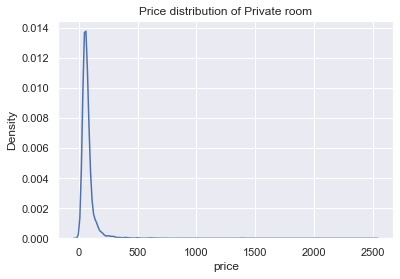

In [342]:
sns.distplot(listings[listings['room_type']=='Private room']['price'],hist=False)
plt.title('Price distribution of Private room')

/Users/yuan/App/conda/anaconda3/envs/Pytorch/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



Text(0.5, 1.0, 'Price distribution of Shared room')

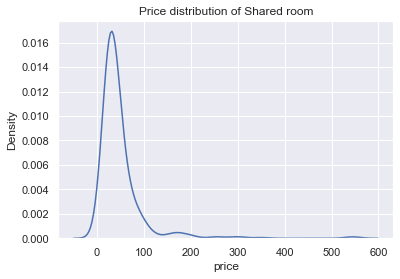

In [343]:
sns.distplot(listings[listings['room_type']=='Shared room']['price'],hist=False)
plt.title('Price distribution of Shared room')

事实上，整个墨尔本的每个房间类型的价格都有很大的差异。查看郊区的价格变化会更合适。

每个郊区每种房型的平均价格比较

In [344]:
listings['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

- Entire home/apt

Text(0.5, 1.0, 'Average price for Entire Apartments/home across suburbs')

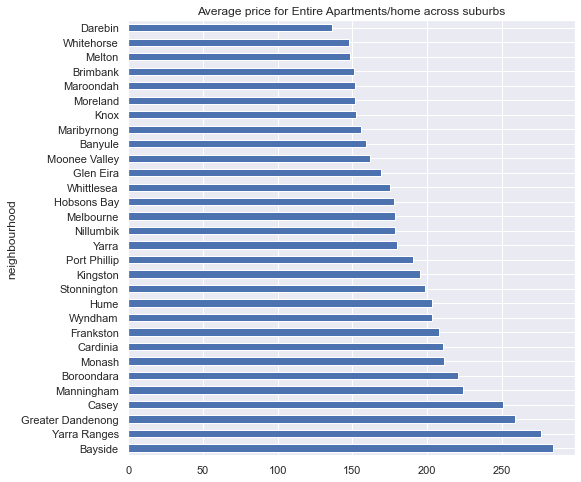

In [345]:
plt.figure(figsize=(8,8))
listings[listings['room_type']=='Entire home/apt'].groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False).plot(kind='barh')
plt.title('Average price for Entire Apartments/home across suburbs')

- Private room

Text(0.5, 1.0, 'Average price for Private room across suburbs')

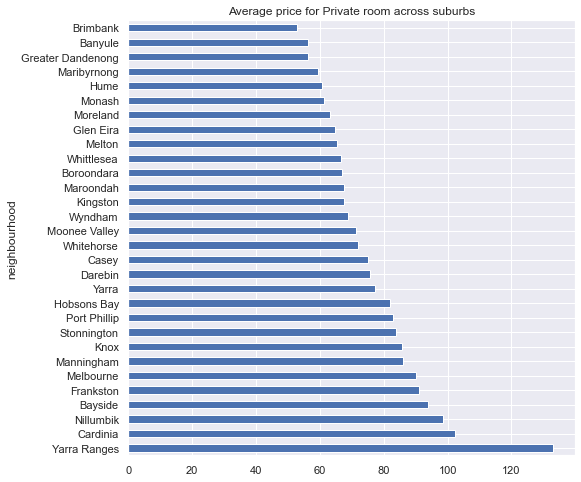

In [346]:
plt.figure(figsize=(8,8))
listings[listings['room_type']=='Private room'].groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False).plot(kind='barh')
plt.title('Average price for Private room across suburbs')

Shared room

Text(0.5, 1.0, 'Average price for Shared room across suburbs')

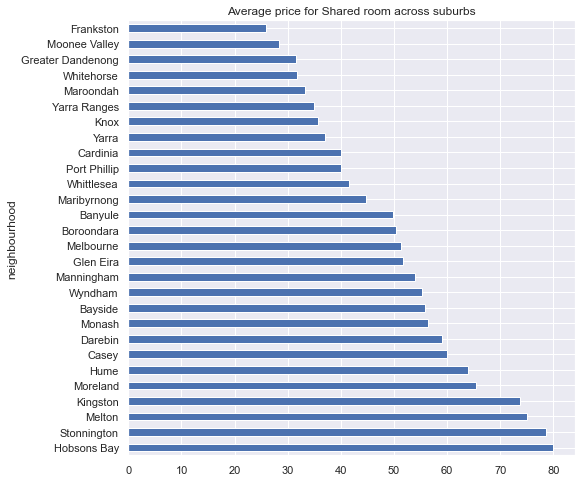

In [347]:
plt.figure(figsize=(8,8))
listings[listings['room_type']=='Shared room'].groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False).plot(kind='barh')
plt.title('Average price for Shared room across suburbs')

整个住宅或公寓的平均价格在海湾地区是最昂贵的，其次是亚拉山脉，而达雷宾地区是转租整个住宅或公寓最便宜的地区。然而，私人房间在亚拉山脉最贵，而在丹德农地区最贵。弗兰克斯顿议会的共用房间最便宜。 

上面的可视化可能会给出一个关于所有郊区不同房间类型的平均价格比较的想法，但可能会产生误导，因为不同郊区的房源强度不同，每个郊区的房源可能会有很大的差异，从而偏离了平均价格 
 
 

**根据下面盒图可以很明显看出，每个郊区都有一些离群值偏离平均价格。比较中位数而不是平均值将是很好的。**

/Users/yuan/App/conda/anaconda3/envs/Pytorch/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='price', ylabel='neighbourhood'>

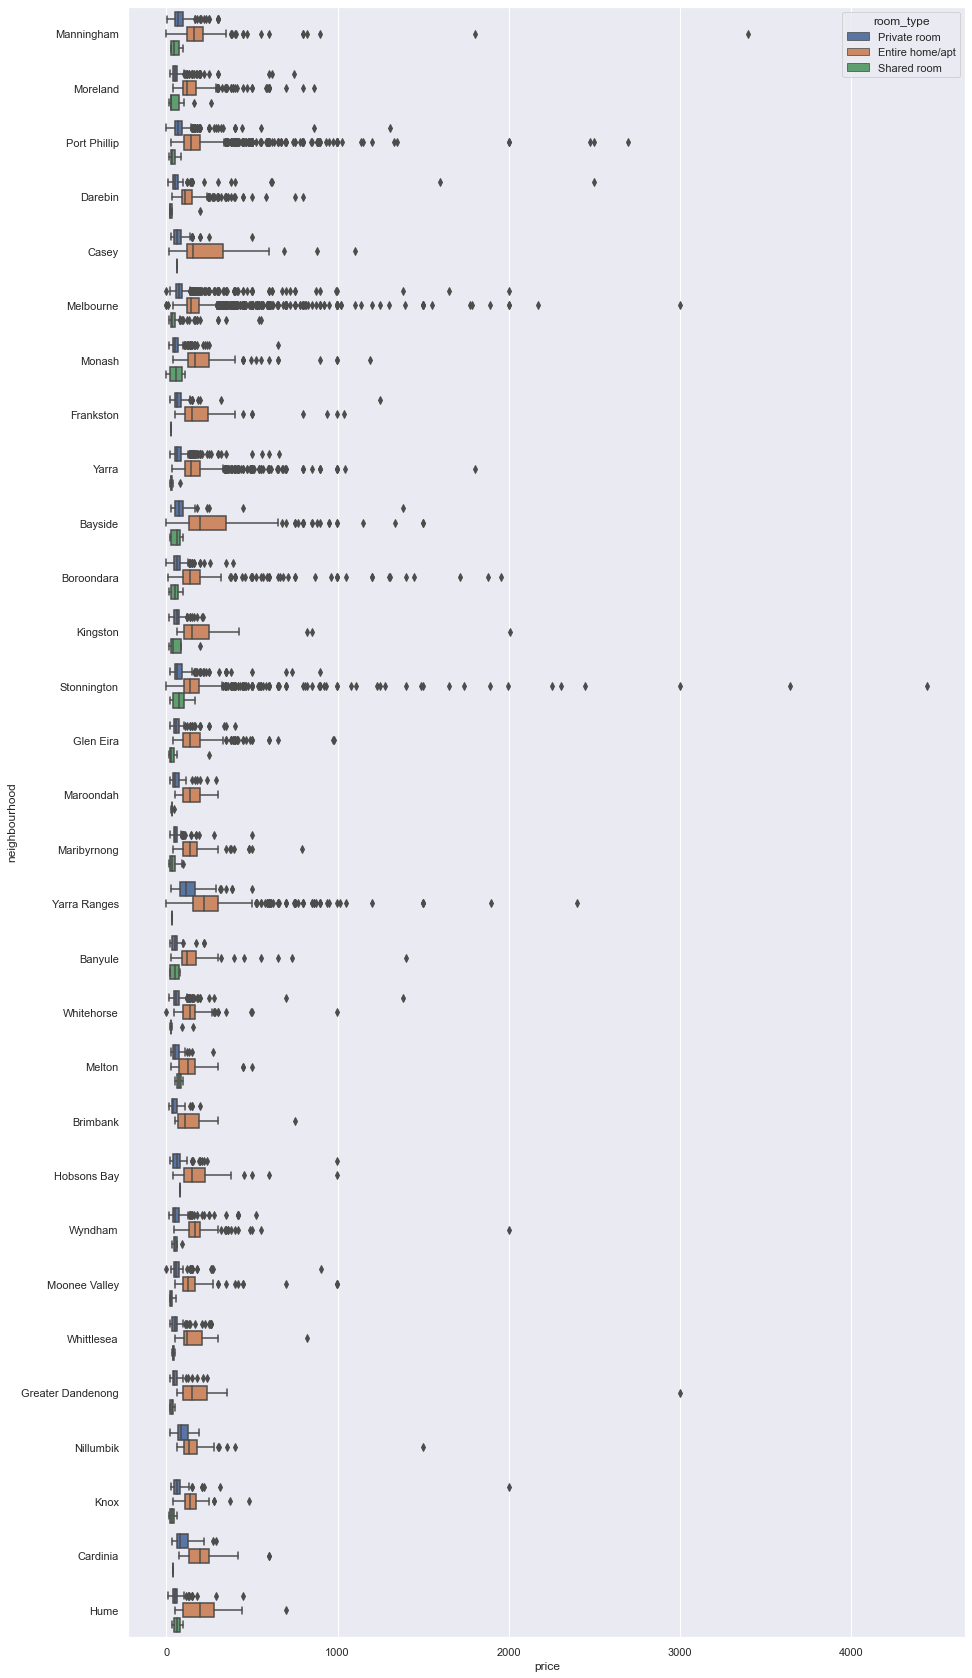

In [348]:
plt.figure(figsize=(15,30))
sns.boxplot('price','neighbourhood',data= listings,hue= 'room_type')

In [349]:
median_price = listings.groupby(['neighbourhood','room_type'])['price'].median().unstack()
median_price.index

Index(['Banyule', 'Bayside', 'Boroondara', 'Brimbank', 'Cardinia', 'Casey',
       'Darebin', 'Frankston', 'Glen Eira', 'Greater Dandenong', 'Hobsons Bay',
       'Hume', 'Kingston', 'Knox', 'Manningham', 'Maribyrnong', 'Maroondah',
       'Melbourne', 'Melton', 'Monash', 'Moonee Valley', 'Moreland',
       'Nillumbik', 'Port Phillip', 'Stonnington', 'Whitehorse', 'Whittlesea',
       'Wyndham', 'Yarra', 'Yarra Ranges'],
      dtype='object', name='neighbourhood')

下面的图表提供了有关每个郊区每种房间类型的价格分布的清晰而可靠的信息。
对粒度级别进行分析，并查看要预订的最昂贵和最便宜的列表

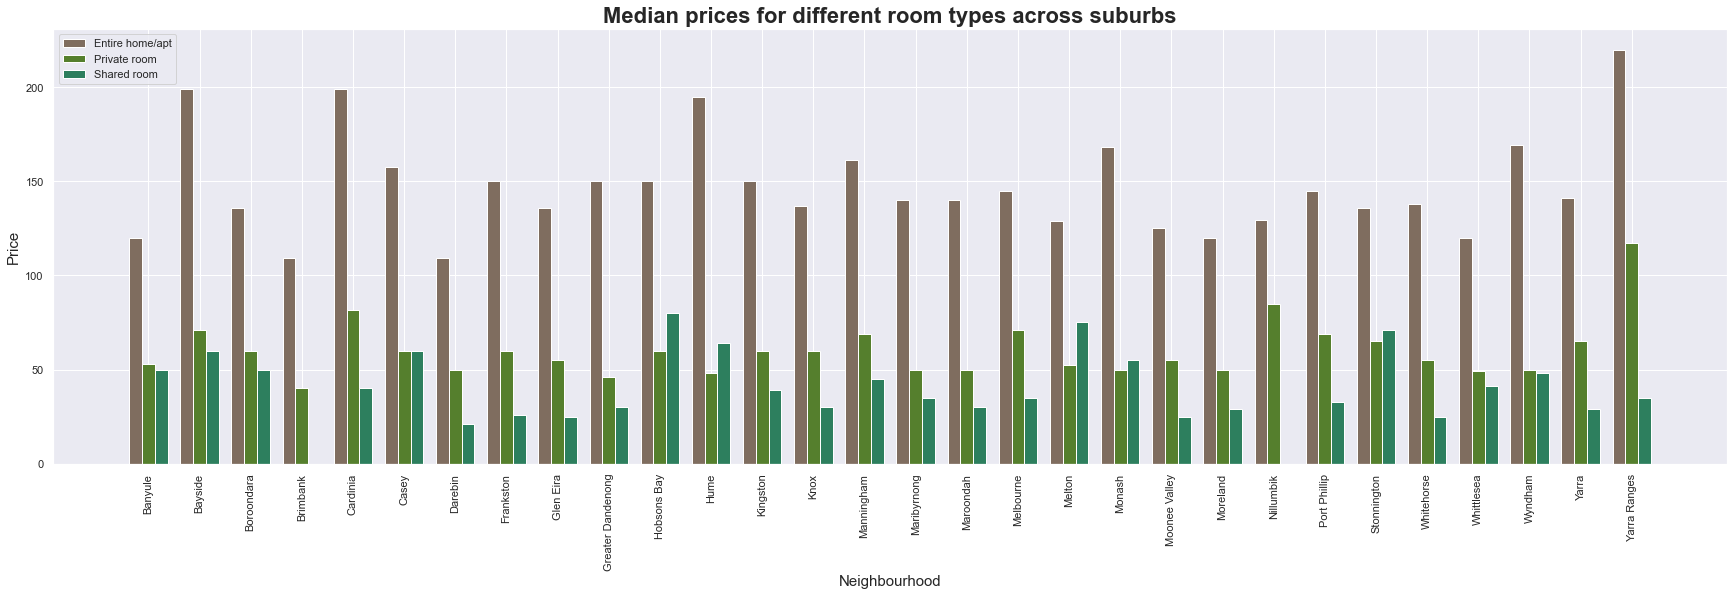

In [350]:
plt.figure(figsize=(30,8))


barWidth = 0.25


r1 = np.arange(len(median_price))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]



plt.bar(r1, median_price['Entire home/apt'], color='#7f6d5f', width=barWidth, edgecolor='white', label='Entire home/apt')
plt.bar(r2, median_price['Private room'], color='#557f2d', width=barWidth, edgecolor='white', label='Private room')
plt.bar(r3, median_price['Shared room'], color='#2d7f5e', width=barWidth, edgecolor='white', label='Shared room')



plt.xlabel('Neighbourhood', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks([r + barWidth for r in range(len(median_price))], ['Banyule', 'Bayside', 'Boroondara', 'Brimbank', 'Cardinia', 'Casey',
       'Darebin', 'Frankston', 'Glen Eira', 'Greater Dandenong', 'Hobsons Bay',
       'Hume', 'Kingston', 'Knox', 'Manningham', 'Maribyrnong', 'Maroondah',
       'Melbourne', 'Melton', 'Monash', 'Moonee Valley', 'Moreland',
       'Nillumbik', 'Port Phillip', 'Stonnington', 'Whitehorse', 'Whittlesea',
       'Wyndham', 'Yarra', 'Yarra Ranges'],rotation=90)

plt.title('Median prices for different room types across suburbs',fontweight='bold', fontsize=22)


plt.legend()
plt.show()

最昂贵的房子列表

In [351]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go



# creating trace1
trace1 =go.Scatter(
                    x = listings[listings['room_type']=='Entire home/apt'].sort_values('price',ascending=False).head(20)['neighbourhood'],
                    y = listings[listings['room_type']=='Entire home/apt'].sort_values('price',ascending=False).head(20)['price'],
                    mode = "markers",
                    name = "Entire home/apt",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'))

# creating trace2
trace2 =go.Scatter(
                    x = listings[listings['room_type']=='Private room'].sort_values('price',ascending=False).head(20)['neighbourhood'],
                    y = listings[listings['room_type']=='Private room'].sort_values('price',ascending=False).head(20)['price'],
                    mode = "markers",
                    name = "Private room",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'))


# creating trace3
trace3 =go.Scatter(
                    x = listings[listings['room_type']=='Shared room'].sort_values('price',ascending=False).head(20)['neighbourhood'],
                    y = listings[listings['room_type']=='Shared room'].sort_values('price',ascending=False).head(20)['price'],
                    mode = "markers",
                    name = "Shared room",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'))


data = [trace1, trace2, trace3]
layout = dict(title = 'Top 20 expensive listings',
              xaxis= dict(title= 'Neighbourhood',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Price',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

最便宜列表

In [352]:
# creating trace1
trace1 =go.Scatter(
                    x = listings[listings['room_type']=='Entire home/apt'].sort_values('price').head(50)['neighbourhood'],
                    y = listings[listings['room_type']=='Entire home/apt'].sort_values('price').head(50)['price'],
                    mode = "markers",
                    name = "Entire home/apt",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'))

# creating trace2
trace2 =go.Scatter(
                    x = listings[listings['room_type']=='Private room'].sort_values('price').head(50)['neighbourhood'],
                    y = listings[listings['room_type']=='Private room'].sort_values('price').head(50)['price'],
                    mode = "markers",
                    name = "Private room",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'))


# creating trace3
trace3 =go.Scatter(
                    x = listings[listings['room_type']=='Shared room'].sort_values('price').head(50)['neighbourhood'],
                    y = listings[listings['room_type']=='Shared room'].sort_values('price').head(50)['price'],
                    mode = "markers",
                    name = "Shared room",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'))


data = [trace1, trace2, trace3]
layout = dict(title = 'Cheapest listings',
              xaxis= dict(title= 'Neighbourhood',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Price',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

所有列表

In [353]:
# creating trace1
trace1 =go.Scatter(
                    x = listings[listings['room_type']=='Entire home/apt'].sort_values('price')['neighbourhood'],
                    y = listings[listings['room_type']=='Entire home/apt'].sort_values('price')['price'],
                    mode = "markers",
                    name = "Entire home/apt",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'))

# creating trace2
trace2 =go.Scatter(
                    x = listings[listings['room_type']=='Private room'].sort_values('price')['neighbourhood'],
                    y = listings[listings['room_type']=='Private room'].sort_values('price')['price'],
                    mode = "markers",
                    name = "Private room",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'))


# creating trace3
trace3 =go.Scatter(
                    x = listings[listings['room_type']=='Shared room'].sort_values('price')['neighbourhood'],
                    y = listings[listings['room_type']=='Shared room'].sort_values('price')['price'],
                    mode = "markers",
                    name = "Shared room",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'))


data = [trace1, trace2, trace3]
layout = dict(title = 'All listings with Price',
              xaxis= dict(title= 'Neighbourhood',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Price',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

##### 3 房间类型及其分布是什么

In [354]:
trace1 = go.Bar(
    y=listings['room_type'].value_counts(normalize=True).values,
    x=listings['room_type'].value_counts(normalize=True).index,
    name='Proportion of listings for each room type across Melbourne',
    marker=dict(
        color='darkblue'
    )
)

data = [trace1]
layout = go.Layout(
    title='Proportion of listings for each room type across Melbourne',
    font=dict(
        size=16
    ),
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='barchart')

我们已经可以看到人们正在使用AirBnB进行赚钱业务 (这是正确的)，但正在转租他们的整个房子/公寓，这不是公司的主要目标，因为他们希望他们的用户通过与来自不同背景的人分享住宿来体验多元多样的环境。

让我们检查一下这些房间类型的比例率差异最大的郊区。

In [355]:
count = listings.groupby(['neighbourhood','room_type'])['room_type'].count().unstack()
count.head(2)

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Banyule,105.0,93.0,5.0
Bayside,260.0,108.0,7.0


In [356]:
count.replace(np.NaN,0,inplace=True)
count_proportion = count.div(count.sum(axis=1),axis=0)
count_proportion.head(2)

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Banyule,0.517241,0.458128,0.024631
Bayside,0.693333,0.288000,0.018667


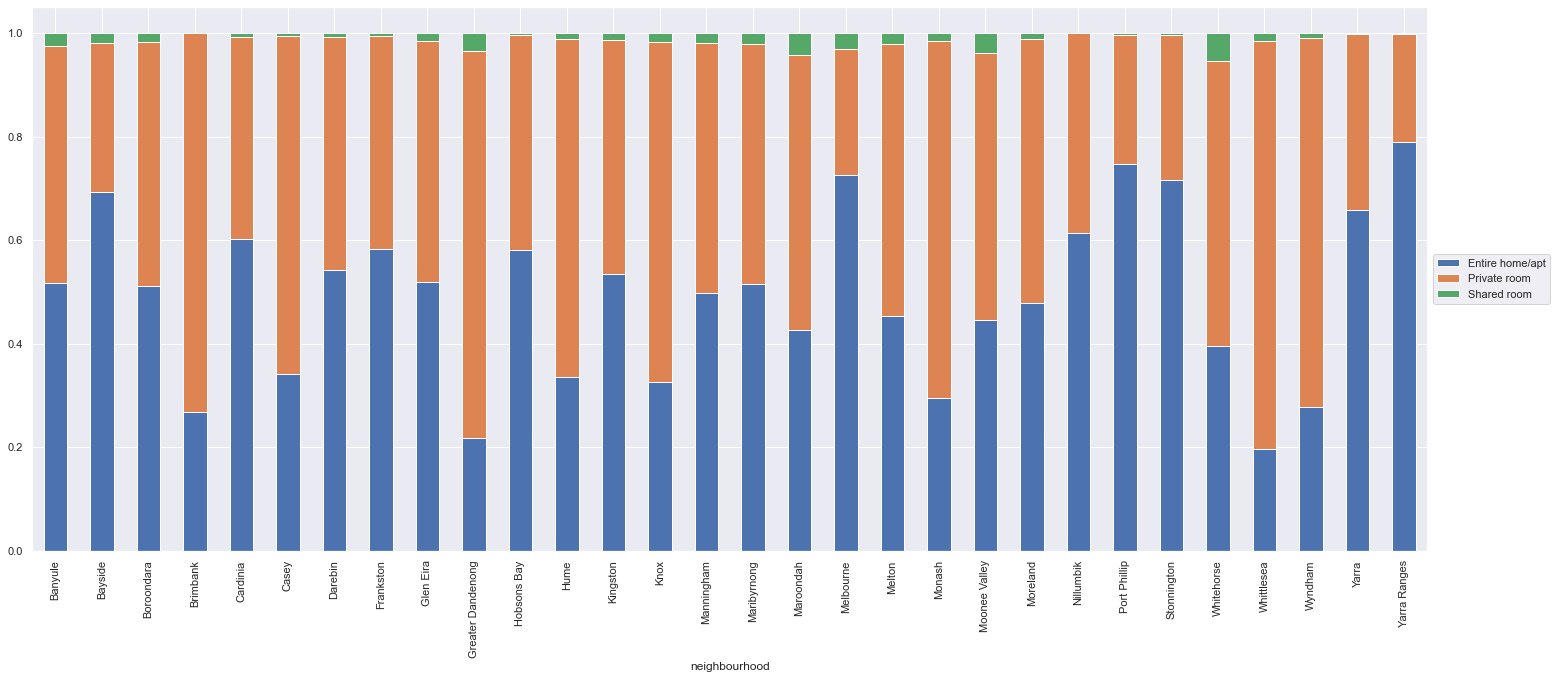

In [357]:
count_proportion.plot(kind='bar',stacked=True,figsize=(25, 10))
# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))